### Importación de librerías a utilizar

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importación de datasets

In [39]:
# Se procesan todos los archivos csv origen
folder_path = "./Datos origen/"

csv_files = [f for f in os.listdir(folder_path) if f.lower().endswith(".csv")]

dfs=[]

# Lista de columnas de años
year_columns = set()

# Se itera sobre cada CSV detectado
for file in csv_files:
    # Lectura del CSV
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    # Filtro sólo la fila para Argentina
    df_arg = df[df['Country Name'] == 'Argentina'].copy()
    
    # Identifico columnas que sean años (se asume que son columnas que pueden convertirse a entero)
    current_years = [col for col in df_arg.columns if col.isdigit()]

    # Agrego al conjunto de columnas de años
    year_columns.update(current_years)
    
    # Almaceno el DataFrame filtrado en la lista
    dfs.append(df_arg)

# Ordeno el conjunto de años en una lista ordenada
year_columns = sorted(list(year_columns), key=int)

# Uno columnas fijas y columnas variables (años)
fixed_columns = ["Country Name", "Indicator Name"]
full_columns = fixed_columns + year_columns

# Reindexo cada DataFrame para que tengan las mismas columnas
dfs_reindexed = [df.reindex(columns=full_columns) for df in dfs]

# Uno todos los DataFrames en uno solo
merged_df = pd.concat(dfs_reindexed, ignore_index=True)

# Formateo los N° flotantes para que mostrar el dataset y que los valores numéricos se vean con 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format) 
merged_df


,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Argentina,"Computer, communications and other services (%...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.89,34.61,31.18,31.06,31.85,36.60,53.49,57.14,39.21,39.24
1,Argentina,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.00,99.70,99.90,100.00,100.00,100.00,100.00,100.00,100.00,NaN
2,Argentina,Urban population (% of total population),73.61,74.22,74.77,75.31,75.84,76.37,76.89,77.40,...,91.38,91.50,91.63,91.75,91.87,91.99,92.11,92.23,92.35,92.46
3,Argentina,GNI (current US$),NaN,NaN,25083407626.94,18744951947.77,26267861213.22,29078234021.45,29796191127.53,24344243038.88,...,515532241212.85,583615452086.54,545251641127.71,627200463933.82,506094045059.70,430166792070.57,375344057341.93,476802271007.63,621165221747.64,632729881149.35
4,Argentina,GDP per capita (current US$),NaN,NaN,1160.31,852.97,1176.20,1281.83,1275.08,1063.93,...,12233.14,13679.63,12699.96,14532.50,11752.80,9955.97,8535.60,10738.02,13935.68,14187.48
5,Argentina,Individuals using the Internet (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.70,68.04,70.97,74.29,77.70,79.95,85.51,87.15,88.38,89.23
6,Argentina,"Population, male",10210517.00,10368906.00,10532891.00,10698053.00,10862199.00,11023957.00,11185118.00,11348120.00,...,21305701.00,21537702.00,21752905.00,21953153.00,22142786.00,22307714.00,22419484.00,22478115.00,22527129.00,22596984.00
7,Argentina,"Population, female",10175528.00,10357370.00,10539647.00,10723652.00,10907254.00,11088672.00,11268775.00,11450939.00,...,21718370.00,21939310.00,22147408.00,22335741.00,22512096.00,22665751.00,22772481.00,22834166.00,22880775.00,22941417.00
8,Argentina,GDP (current US$),NaN,NaN,24450604877.61,18272123664.47,25605249381.76,28344705966.64,28630474727.90,24256667553.26,...,526319673731.64,594749285413.21,557532320662.95,643628393281.36,524819892360.18,447754683615.22,385740508436.97,486564085480.04,632790070063.12,646075277525.12
9,Argentina,Secure Internet servers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3837.00,5317.00,32040.00,71731.00,83320.00,135647.00,167248.00,231834.00,240087.00,248239.00


### Inversión de filas y columnas
Para mayor practicidad se invierten las filas y columnas, dejando los indicadores como columnas y en las filas los años 

In [40]:

# Construyo un dataset de formato largo (cada fila tiene la combinación indicador/año)
df_long = pd.melt(
    merged_df,
    id_vars=["Country Name","Indicator Name"],
    var_name="Year",
    value_name="Value"
)

# Convierto la columna 'Year' a tipo numérico
df_long["Year"] = df_long["Year"].astype(int)

# Pivoteo el DataFrame 
df_pivot = df_long.pivot(index="Year", columns="Indicator Name", values="Value")

# Restablezco el índice para tener 'Year' como columna
df_pivot = df_pivot.reset_index()

df_pivot

Indicator Name,Year,Access to electricity (% of population),"Computer, communications and other services (% of commercial service imports)",Fixed broadband subscriptions,GDP (current US$),GDP per capita (current US$),GNI (current US$),Individuals using the Internet (% of population),Mobile cellular subscriptions,"Population, female","Population, male",Secure Internet servers,Urban population (% of total population)
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10175528.00,10210517.00,NaN,73.61
1,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10357370.00,10368906.00,NaN,74.22
2,1962,NaN,NaN,NaN,24450604877.61,1160.31,25083407626.94,NaN,NaN,10539647.00,10532891.00,NaN,74.77
3,1963,NaN,NaN,NaN,18272123664.47,852.97,18744951947.77,NaN,NaN,10723652.00,10698053.00,NaN,75.31
4,1964,NaN,NaN,NaN,25605249381.76,1176.20,26267861213.22,NaN,NaN,10907254.00,10862199.00,NaN,75.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,100.00,36.60,8790000.00,447754683615.22,9955.97,430166792070.57,79.95,56400000.00,22665751.00,22307714.00,135647.00,91.99
60,2020,100.00,53.49,9570000.00,385740508436.97,8535.60,375344057341.93,85.51,54800000.00,22772481.00,22419484.00,167248.00,92.11
61,2021,100.00,57.14,10500000.00,486564085480.04,10738.02,476802271007.63,87.15,59100000.00,22834166.00,22478115.00,231834.00,92.23
62,2022,100.00,39.21,11200000.00,632790070063.12,13935.68,621165221747.64,88.38,59700000.00,22880775.00,22527129.00,240087.00,92.35


### Limpieza y tratamiento de valores nulos

In [41]:
df_pivot.describe() #.style.set_sticky(axis="index")

Indicator Name,Year,Access to electricity (% of population),"Computer, communications and other services (% of commercial service imports)",Fixed broadband subscriptions,GDP (current US$),GDP per capita (current US$),GNI (current US$),Individuals using the Internet (% of population),Mobile cellular subscriptions,"Population, female","Population, male",Secure Internet servers,Urban population (% of total population)
count,64.00,33.00,48.00,23.00,62.00,62.00,62.00,34.00,52.00,64.00,64.00,14.00,64.00
mean,1991.50,96.93,27.83,5272652.17,226310816970.42,5868.08,220083918198.14,34.84,21032312.92,16822311.55,16448220.64,87678.00,85.61
std,18.62,2.64,9.95,3741168.98,194524890205.93,4191.38,190001419040.36,33.29,26977295.85,4026172.47,3915897.91,98033.03,5.60
min,1960.00,92.15,13.92,94000.00,18272123664.47,852.97,18744951947.77,0.00,0.00,10175528.00,10210517.00,1028.00,73.61
25%,1975.75,94.82,18.76,2090000.00,70048441049.35,2408.92,69022847256.43,1.44,0.00,13253302.25,12926936.75,3297.00,81.27
50%,1991.50,97.00,28.09,5150000.00,153005280299.76,4278.68,140755932664.04,23.44,2339967.50,16986423.50,16475487.00,51885.50,87.44
75%,2007.25,99.70,34.81,8155000.00,324469425933.21,8201.80,314943796194.23,67.21,55200000.00,20315963.75,19802645.50,159347.75,90.41
max,2023.00,100.00,57.14,11500000.00,646075277525.12,14532.50,632729881149.35,89.23,67400000.00,22941417.00,22596984.00,248239.00,92.46


## Análisis de datos

### Coeficiente de Pearson

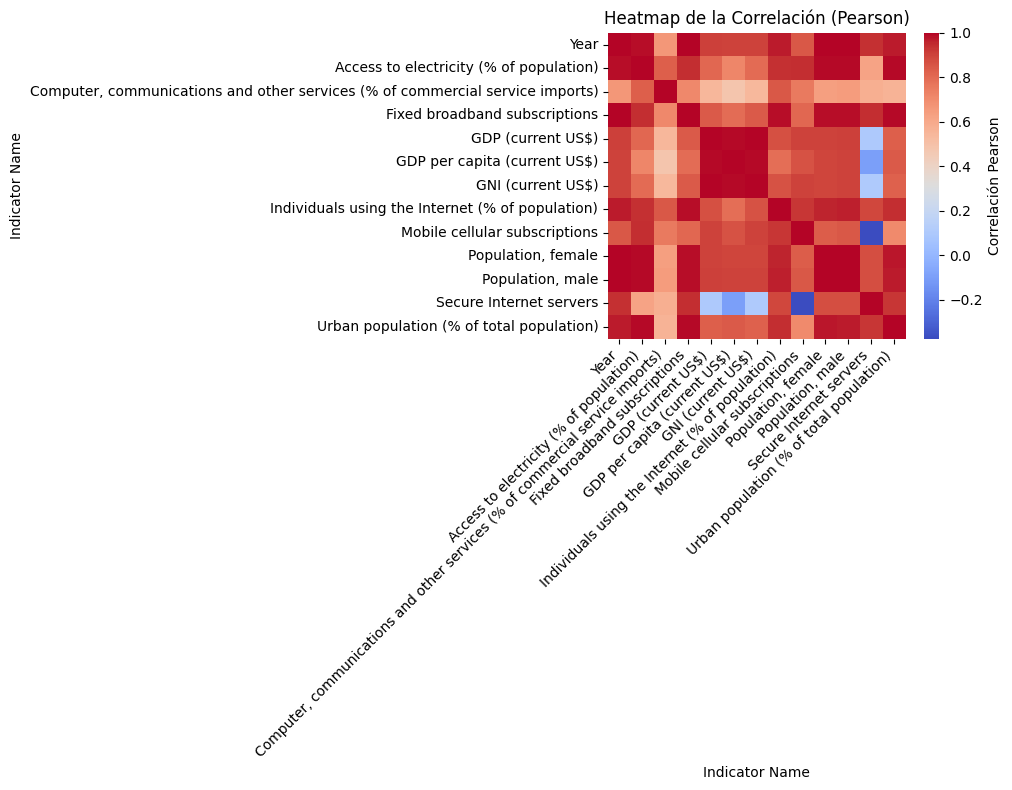

In [42]:
pearson_corr = df_pivot.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    pearson_corr,
    cmap='coolwarm',
    annot=False,
    fmt='.2f',
    cbar_kws={'label': 'Correlación Pearson'}
)
plt.title("Heatmap de la Correlación (Pearson)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Coeficiente de Spearman

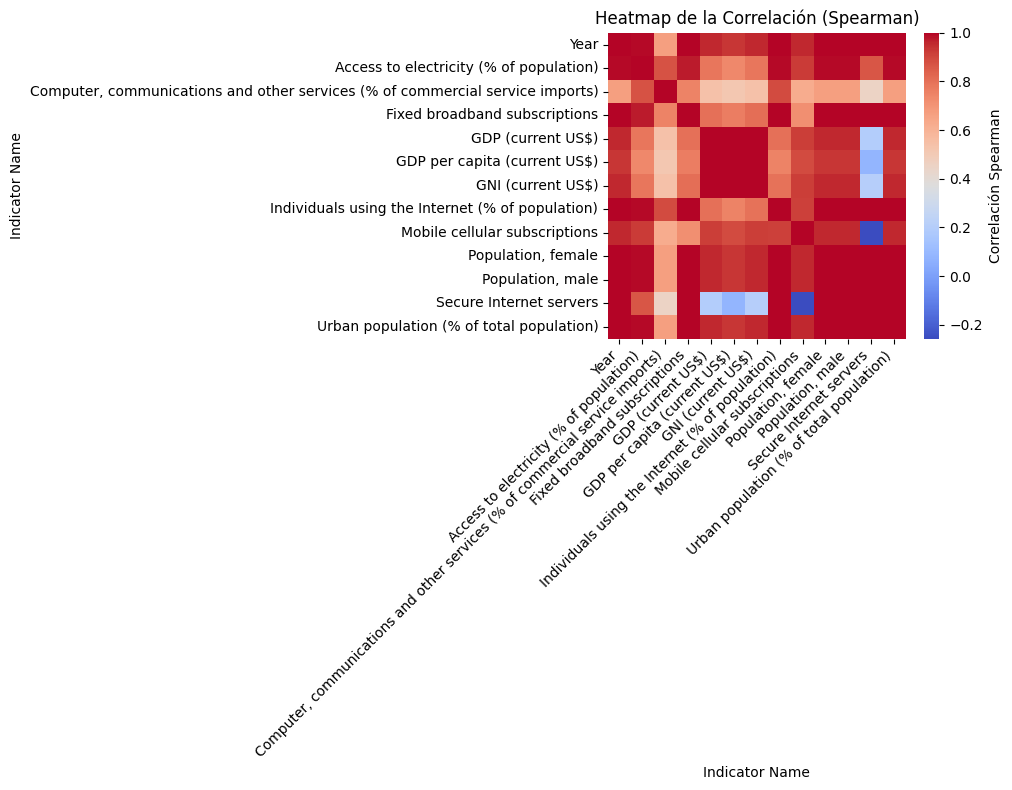

In [43]:
spearman_corr = df_pivot.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(
    spearman_corr,
    cmap='coolwarm',
    annot=False,
    fmt='.2f',
    cbar_kws={'label': 'Correlación Spearman'}
)
plt.title("Heatmap de la Correlación (Spearman)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Exporto el dataset a CSV

In [44]:
df_pivot.to_csv("merged_argentina_data.csv", index=False)